In [1]:
import numpy as np
from math import atan2, pi
import matplotlib.pyplot as plt
import json
import random

from fractions import Fraction

# Opening the polygon file

In [125]:
# path_to_testfile = "./instances_v2/instances/fpg-poly_0000000020_h1.instance.json"
# path_to_testfile = "./instances_v2/instances/socg60.instance.json"
# path_to_testfile = "../instances/fpg-example_instance1.instance.json"

path_to_testfile = "./instances-2IMA15/instances-2IMA15/example_instance1.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000000020_h1.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000000020_h2.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/socg60.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/maze_79_50_05_005.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_octa_mc0000082.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_aligned_mc0000088.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_mc0000080.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/ccheese142.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_octa_mc0000784.instance.json"
path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_iso_aligned_mc0001336.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/maze_4344_250_001_01.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/ccheese4390.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/fpg-poly_0000004900_h2.instance.json"
# path_to_testfile = "./instances-2IMA15/instances-2IMA15/srpg_smo_mc0005962.instance.json"


with open(path_to_testfile) as testfile:
    polygon = json.load(testfile)

In [126]:
print(polygon['type'])
print(polygon['name'])
print(polygon['n'])
# print(polygon['outer_boundary'])
# print(polygon['holes'])
print(len(polygon['holes']))


CGSHOP2023_Instance
srpg_iso_aligned_mc0001336
1344
7


### Plotting the polygon

In [127]:
# listpolygon = []
# for pt in polygon['outer_boundary']:
#     listpolygon.append([pt['x'], pt['y']])

# listpolygon = np.array(listpolygon)

# plt.plot(listpolygon.T[0], listpolygon.T[1])
# # plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
# plt.scatter(listpolygon[0][0], listpolygon[0][1])

# for hole in polygon['holes']:
#     listhole = []
#     for pt in hole:
#         listhole.append([pt['x'], pt['y']])
    
#     listhole = np.array(listhole)

#     plt.plot(listhole.T[0], listhole.T[1])
#     # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
#     plt.scatter(listhole[0][0], listhole[0][1])

# plt.show()


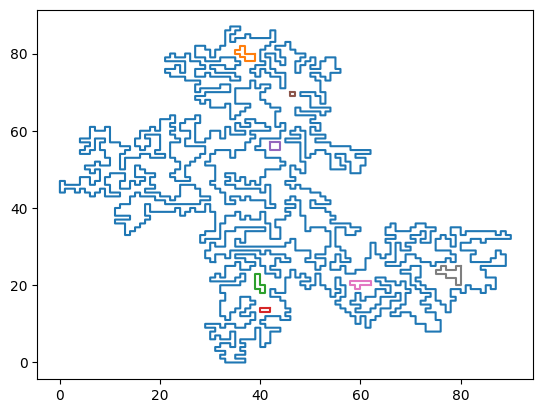

In [128]:
def polygon_plt():
    listpolygon = [[polygon['outer_boundary'][-1]['x'],polygon['outer_boundary'][-1]['y']]]
    for pt in polygon['outer_boundary']:
        listpolygon.append([pt['x'], pt['y']])

    listpolygon = np.array(listpolygon)

    plt.plot(listpolygon.T[0], listpolygon.T[1])

    for hole in polygon['holes']:
        listhole = [[hole[-1]['x'], hole[-1]['y']]]
        for pt in hole:
            listhole.append([pt['x'], pt['y']])
        
        listhole = np.array(listhole)

        plt.plot(listhole.T[0], listhole.T[1])
    
polygon_plt()
plt.show()

# Polygon & helper classes

In [129]:
class Point:
    def __init__(self, x, y, parent = None, incoming = [], outgoing = []):
        self.coordinate = (x,y)
        self.parent = parent
        self.incoming = incoming
        self.outgoing = outgoing

#In case we still want a point class with only 1 list we can use this
class Point1List:
    def __init__(self, x, y, parent, adjacent):
        self.coordinate = (x,y)
        self.parent = parent
        self.adjacent = adjacent
        
class Edge:
    def __init__(self, pt1, pt2, parent):
        self.pt1 = pt1
        self.pt2 = pt2
        self.parent = parent
        self.twin = None
    
    def settwin(self, edge):
        self.twin = edge

class Polygon:
    def __init__(self, isHole, points, edges, holes):
        self.isHole = isHole
        self.points = points
        self.edges = edges
        self.holes = holes

    def setholes(self, holes_new):
        self.holes = holes_new


### Turning polygon dictionary from file into Polygon class

In [130]:
#Creating outer boundary pts, edges, polygon
listpts = []
listpolygons = []
listedges = []
alledges = []
#allpoints = []

#Create points + Edges
for pt in polygon['outer_boundary']:
    (x,y) = [pt['x'], pt['y']]
    #p = Point1List(x,y, None, [])
    p = Point(x,y, None, [], [])
    #print(p.coordinate[0], p.coordinate[1])
    listpts.append(p)

counter = 0
for pt in listpts:
    e = Edge(listpts[counter-1], listpts[counter], None)
    listedges.append(e)
    alledges.append(e)
    counter +=1

#Update adjacent edges
z = len(listpts)
for i in range(z):
    #listpts[i].adjacent.append(listedges[i-1])
    listpts[i].incoming.append(listedges[i])
    if i < z-1:
        #listpts[i].adjacent.append(listedges[i+1])
        listpts[i].outgoing.append(listedges[i+1])
    else:
        listpts[i].outgoing.append(listedges[0])
        #listpts[i].adjacent.append(listedges[0])

#allpoints = listpts

#Create polygon and update parent of points/vertices to be this polygon
poly = Polygon(0, listpts, listedges, [])
for edges in poly.edges:
    edges.parent = poly #Update edges parent
for pts in poly.points:
    pts.parent = poly #Update point parent

#Print checks to get items
#for element in poly.points:
#    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))

print("Basic (Outside) polygon has now", len(poly.edges), "Edges and", len(poly.points), "Points")


Basic (Outside) polygon has now 1290 Edges and 1290 Points


In [131]:
#Do the same for holes
counter = 0
if len(polygon['holes']) == 0:
    ishole = 0
else:
    ishole = 1

#If we have holes, we are allowed to do this part    
if ishole:

    length_holes = len(polygon['holes'])
    listholepolygons = []
    
    #We might get multiple holes, so 1 list per hole for the edges and points of a hole
    for ctr in range(length_holes):
        listholeedges = []
        listholepts = []
        
        #Points in hole
        length = len(polygon['holes'][ctr])
        for n in range(length):
            (xh,yh) = (polygon['holes'][ctr][n]['x'], polygon['holes'][ctr][n]['y'])
            #print((xh,yh))
            #p = Point1List(xh,yh, None, [])
            p = Point(xh,yh, None, [], [])
            listholepts.append(p)
        
        #Edges in hole
        counter = 0
        for pt in listholepts:
            e = Edge(listholepts[counter-1], listholepts[counter], None)
            #print("EDGE Added:", e.pt1, e.pt2)
            listholeedges.append(e)
            alledges.append(e)
            counter +=1

        #adjacent edges of a point
        z = len(listholepts)
        for i in range(z):
            #listholepts[i].adjacent.append(listholeedges[i])
            listholepts[i].incoming.append(listholeedges[i])
            if i < z-1:
                #listholepts[i].adjacent.append(listholeedges[i+1])
                listholepts[i].outgoing.append(listholeedges[i+1])
            else:
                listholepts[i].outgoing.append(listholeedges[0])
                #listholepts[i].adjacent.append(listedges[0])
              
        counter = 0
        h = Polygon(1, listholepts, listholeedges, [])
        #Update all edges and points to make sure that the parent is set to this hole
        for edges in h.edges:
            edges.parent = h #Update edges parent
        for pts in h.points:
            pts.parent = h #Update point parent
            #allpoints.append(pts)

        #append hole to list
        listholepolygons.append(h)
        
    #add all holes we created in the main polygon
    poly.setholes(listholepolygons)
    #print(len(poly.holes))

    print("Updated (Outside + Holes) polygon has now", len(poly.edges), "Edges and", len(poly.points), "Points, Including", len(poly.holes), "Holes")
    #for element in poly.points:
    #    print(element.coordinate, element.parent, (element.incoming[0].pt1, element.incoming[0].pt2), (element.outgoing[0].pt1, element.outgoing[0].pt2))
    # for holex in poly.holes:
    #     for pt in holex.points:
    #         print(pt.coordinate)
    #for elem in range(len(alledges)):
    #    print(alledges[elem].pt1, alledges[elem].pt2)

Updated (Outside + Holes) polygon has now 1290 Edges and 1290 Points, Including 7 Holes


# Useful functions

### Orientation variants

In [132]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation(p1, p2, p3):

    #vector from p1 to p2
    a = [(int(p2['x']) - int(p1['x'])), (int(p2['y']) - int(p1['y']))]
    #vector from p1 to p3
    b = [(int(p3['x']) - int(p1['x'])), (int(p3['y']) - int(p1['y']))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    if cross == 0: #colinear
        return 0
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross)

In [133]:
#returns the orientation of p3 wrt line through p1 and p2
def orientation_class(p1, p2, p3):

    #vector from p1 to p2
    a = [p2.coordinate[0] - p1.coordinate[0], p2.coordinate[1] - p1.coordinate[1]]
    #vector from p1 to p3
    b = [p3.coordinate[0] - p1.coordinate[0], p3.coordinate[1] - p1.coordinate[1]]

    #cross product
    cross = a[0] * b[1] - a[1] * b[0]

    if cross == 0: #colinear
        return 0, cross
    else: #sign gives left or right of \bar{p1p2}
        return np.sign(cross), cross

In [134]:
#returns the orientation as sign and its exact value (needed for sorting) of p3 wrt line through p1 and p2 using the coordinates only
def orientation_coordinates(p1, p2, p3):
    #vector from p1 to p2
    a = [(int(p2[0]) - int(p1[0])), (int(p2[1]) - int(p1[1]))]
    #vector from p1 to p3
    b = [(int(p3[0]) - int(p1[0])), (int(p3[1]) - int(p1[1]))]

    #cross product
    cross = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])
    val = cross

    if cross == 0: #colinear
        return 0, val
    else: #sign gives left or right of \bar{p1p2} and the exact value
        return np.sign(cross), val

### Finding reflex vertices

In [135]:
def find_reflex(polygon):
    n = polygon['n']
    bdry = polygon['outer_boundary']
    holes = polygon['holes']
    count = 0
    reflex = []

    for i in range(len(bdry)):
        if orientation(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)]) == -1: reflex.append(bdry[i]); count += 1

    for hole in holes:
        for i in range(len(hole)):
            if orientation(hole[(i-1)], hole[i], hole[(i+1) % len(hole)]) == -1: reflex.append(hole[i]); count += 1

    return reflex, count

In [136]:
def find_reflex_in_class(polygon):
    bdry = polygon.points
    holes = polygon.holes
    count = 0
    reflex = []
    allpts = []

    for i in range(len(bdry)):
        if orientation_class(bdry[(i-1)], bdry[i], bdry[(i+1) % len(bdry)])[0] == -1: 
            reflex.append(bdry[i]); count += 1
        allpts.append(bdry[i])
    
    # print("We found", len(reflex), "Reflex points in our outer boundary of the polygon")
    for hole in holes:
        for i in range(len(hole.points)):
            if orientation_class(hole.points[(i-1)], hole.points[i], hole.points[(i+1) % len(hole.points)])[0] == -1: 
                reflex.append(hole.points[i]); count += 1
            allpts.append(hole.points[i])

    return reflex, count, allpts

refl, nr, all = find_reflex_in_class(poly)
# print("We found", nr, "reflex vertices in the polygon (including its holes)")
#for i in refl:
#    print(i.coordinate, i.incoming[0].pt1, i.incoming[0].pt2, i.outgoing[0].pt1, i.outgoing[0].pt2)

### Plotting reflex vertices 

In [137]:
# reflex, r = find_reflex(polygon)

In [138]:
# listpolygon = [[polygon['outer_boundary'][-1]['x'], polygon['outer_boundary'][-1]['y']]]
# for pt in polygon['outer_boundary']:
#     listpolygon.append([pt['x'], pt['y']])

# listpolygon = np.array(listpolygon)

# plt.plot(listpolygon.T[0], listpolygon.T[1])
# # plt.scatter(listpolygon.T[0][1:], listpolygon.T[1][1:])
# # plt.scatter(listpolygon[1][0], listpolygon[1][1])

# for hole in polygon['holes']:
#     listhole = [[hole[-1]['x'], hole[-1]['y']]]
#     for pt in hole:
#         listhole.append([pt['x'], pt['y']])
    
#     listhole = np.array(listhole)

#     plt.plot(listhole.T[0], listhole.T[1])
#     # plt.scatter(listhole.T[0][1:], listhole.T[1][1:])
#     # plt.scatter(listhole[1][0], listhole[1][1])

# listreflex = []
# for pt in reflex:
#     listreflex.append([pt['x'], pt['y']])

# listreflex = np.array(listreflex)

# plt.scatter(listreflex.T[0], listreflex.T[1], c='red')

# plt.show()

### Angle between 3 points

In [139]:
def angle(p1: Point, p2: Point, p3: Point):
    # Ax, Ay = p1.coordinate[0] - p2.coordinate[0], p1.coordinate[1] - p2.coordinate[1]
    # Cx, Cy = p3.coordinate[0] - p2.coordinate[0], p3.coordinate[1] - p2.coordinate[1]
    Ax, Ay = p3.coordinate[0] - p2.coordinate[0], p3.coordinate[1] - p2.coordinate[1]
    Cx, Cy = p1.coordinate[0] - p2.coordinate[0], p1.coordinate[1] - p2.coordinate[1]

    a = atan2(Ay, Ax)
    c = atan2(Cy, Cx)
    if a < 0: a += pi*2
    if c < 0: c += pi*2
    return (pi*2 + c - a) if a > c else (c - a) 

### Misc

In [140]:
def dist(p: Point, q: Point):
    return ((p.coordinate[0] - q.coordinate[0])**2 + (p.coordinate[1] - q.coordinate[1])**2)#**Fraction(1,2))

In [141]:
a = Point(Fraction(3, 2), Fraction(0, 1), *[None]*3)
b = Point(Fraction(6, 2), Fraction(0, 1), *[None]*3)

dist(a,b)

Fraction(9, 4)

In [142]:
def intersection_point_error(l1: Edge, l2: Edge):
    # get the slopes from the lines defined by the endpoints of the edge
    slope1 = (l1.pt2.coordinate[1] - l1.pt1.coordinate[1]) / (l1.pt2.coordinate[0] - l1.pt1.coordinate[0])
    slope2 = (l2.pt2.coordinate[1] - l2.pt1.coordinate[1]) / (l2.pt2.coordinate[0] - l2.pt1.coordinate[0])

    # find the y-intercepts
    y_in1 = l1.pt1.coordinate[1] - slope1 * l1.pt1.coordinate[0]
    y_in2 = l2.pt1.coordinate[1] - slope1 * l2.pt1.coordinate[0]

    # mx+b-y=0 ->
    # m1x + b1 - y = m2x + b2 - y ->
    # add y both sides and solve for x
    x = (y_in2 - y_in1) / (slope1 - slope2)
    # substitute x in equation for one of the lines
    y = slope1 * x + y_in1

    return Point(x, y, None, [], [])


In [143]:
# Computes the intersection point of two lines each defined by two Points
# achieved with line equations
# def intersection_point(l1: Edge, l2: Edge):
#     dy1 = l1.pt2.coordinate[1] - l1.pt1.coordinate[1]
#     dx1 = l1.pt2.coordinate[0] - l1.pt1.coordinate[0]
#     # slope1 = dy1 / dx1

#     dy2 = l2.pt2.coordinate[1] - l2.pt1.coordinate[1]
#     dx2 = l2.pt2.coordinate[0] - l2.pt1.coordinate[0]
#     # slope2 = dy2 / dx2
    
#     # points on the lines that will be used to find intercepts
#     pt2 = l1.pt2
#     pt4 = l2.pt2

#     # y-intercepts
#     b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
#     b1den = dx1

#     b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
#     b2den = dx2

#     # the x-coordinate of the intersection point
#     xnum = (b2num * b1den - b1num * b2den)
#     xden = dy1 * dx2 - dy2 * dx1

#     # the y-coordinate of the intersection point
#     ynum = dy1 * xnum + b1num * xden
#     yden = dx1 * xden

#     return Point(Fraction(xnum, xden), Fraction(ynum, yden), *[None]*3), Point((xnum / xden),(ynum / yden), *[None]*3)

In [144]:
# Computes the intersection point of two lines each defined by two Points
# achieved with line equations
def intersection_point(l1: Edge, l2: Edge):
    dy1 = l1.pt2.coordinate[1] - l1.pt1.coordinate[1]
    dx1 = l1.pt2.coordinate[0] - l1.pt1.coordinate[0]
    # slope1 = dy1 / dx1

    dy2 = l2.pt2.coordinate[1] - l2.pt1.coordinate[1]
    dx2 = l2.pt2.coordinate[0] - l2.pt1.coordinate[0]
    # slope2 = dy2 / dx2

    xnum,xden,ynum,yden = [-1]*4

    if dx1 == 0 and dx2 != 0:
        xnum = l1.pt1.coordinate[0]
        xden = 1

        pt4 = l2.pt2
        
        b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
        b2den = dx2

        ynum = dy2 * xnum + b2num * xden
        yden = dx2 * xden

    elif dx2 == 0 and dx1 != 0:
        xnum = l2.pt1.coordinate[0]
        xden = 1

        pt2 = l1.pt2
        b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
        b1den = dx1

        ynum = dy1 * xnum + b1num * xden
        yden = dx1 * xden

    elif dx1 == 0 and dx2 == 0:
        if l1.pt1.coordinate[0] != l2.pt1.coordinate[0]:
            return None, None
        
        y1 = l1.pt1.coordinate[1]
        return (l2.pt1, l2.pt1) if abs(l2.pt1.coordinate[1] - y1) <= abs(l2.pt2.coordinate[1] - y1) else (l2.pt2, l2.pt2)
    else:
        # points on the lines that will be used to find intercepts
        pt2 = l1.pt2
        pt4 = l2.pt2

        # y-intercepts
        b1num = pt2.coordinate[1] * dx1 - pt2.coordinate[0] * dy1
        b1den = dx1

        b2num = pt4.coordinate[1] * dx2 - pt4.coordinate[0] * dy2
        b2den = dx2

        if dy1 == 0 and dy2 == 0:
            if l1.pt1.coordinate[1] != l2.pt1.coordinate[1]:
                return None, None
            
            x1 = l1.pt1.coordinate[0]
            return (l2.pt1, l2.pt1) if abs(l2.pt1.coordinate[0] - x1) <= (l2.pt2.coordinate[0] - x1) else (l2.pt2, l2.pt2)

        elif dy1 == 0 and dy2 != 0:
            y1 = l1.pt1.coordinate[1]
            
            xnum = y1 - Fraction(b2num, b2den)
            xden = Fraction(dy2, dx2)

            ynum = dy2 * xnum + b2num * xden
            yden = dx2 * xden
        elif dy2 == 0 and dy1 != 0:
            y2 = l2.pt1.coordinate[1]
            
            xnum = y2 - Fraction(b1num, b1den)
            xden = Fraction(dy1, dx1)

            ynum = dy1 * xnum + b1num * xden
            yden = dx1 * xden
        else:
            # the x-coordinate of the intersection point
            xnum = (b2num * b1den - b1num * b2den)
            xden = dy1 * dx2 - dy2 * dx1

            # the y-coordinate of the intersection point
            ynum = dy1 * xnum + b1num * xden
            yden = dx1 * xden

            # if xden == 0: #same slope


            if xden == 0 or yden == 0:
                print((l1.pt1.coordinate, l1.pt2.coordinate))
                print((l2.pt1.coordinate, l2.pt2.coordinate))

    return Point(Fraction(xnum, xden), Fraction(ynum, yden), None, [], []), Point((xnum / xden),(ynum / yden), None, [], [])

In [145]:
x1 = Point(57, 39, *[None]*3)
x2 = Point(2, 2, *[None]*3)
l1 = Edge(x1,x2,None)

x3 = Point(4, 1, *[None]*3)
x4 = Point(3, 44, *[None]*3)
l2 = Edge(x3, x4, None)

print(intersection_point_error(l1,l2).coordinate)

print(intersection_point(l1, l2)[0].coordinate)
print(intersection_point(l1, l2)[1].coordinate)

(-0.05370524562864283, 0.6184164711225509)
(Fraction(9479, 2402), Fraction(7949, 2402))
(3.9462947543713573, 3.30932556203164)


In [146]:
def pointequals(p1: Point, p2: Point) -> bool:
    return p1.coordinate[0] == p2.coordinate[0] and p1.coordinate[1] == p2.coordinate[1]

In [147]:
def other(e: Edge, p: Point) -> Point:
    return e.pt1 if pointequals(p, e.pt2) else e.pt2

In [148]:
def edge_plt(e: Edge, scatter=True):
    xs = [e.pt1.coordinate[0], e.pt2.coordinate[0]]
    ys = [e.pt1.coordinate[1], e.pt2.coordinate[1]]
    plt.plot(xs, ys, c='black')
    if scatter: plt.scatter(xs[1:], ys[1:], c='black')

In [149]:
def pt_plot(pts: list[Point]):
    for pt in pts:
        plt.scatter([pt.coordinate[0]], [pt.coordinate[1]])

# Sweep algorithm

### Event queue initialization

In [150]:
# #Add all points of polygon outer boundary and holes together to loop over all points to decide with orientation test which are in region of sweep
# allpoints = []
# for element in poly.points:
#     allpoints.append(element)
# for elements in poly.holes:
#     for pts in elements.points:
#         allpoints.append(pts)

# eventqueue_per_reflex = []
# for i in range(nr):
#     in_queue_of_reflex = []
#     to_list = []
#     for ap in allpoints:
#         # res = orientation_coordinates(refl[i].incoming[0].pt2, refl[i].coordinate, ap.coordinate)
#         # res2 = orientation_coordinates(refl[i].outgoing[0].pt1, refl[i].coordinate, ap.coordinate)
#         res = orientation_class(refl[i].incoming[0].pt2, refl[i], ap)
#         res2 = orientation_class(refl[i].outgoing[0].pt1, refl[i], ap)
#         if (res[0] == -1 and res2[0] == -1):
#             in_queue_of_reflex.append((ap, res[1])) #only if the point is inside the "wedge" of the extended incoming and outgoing edges it is in the eventqueue
#     #print(in_queue_of_reflex)
#     in_queue_of_reflex.sort(reverse=True, key=lambda v: v[1]) #We sort on descending order on the real value of the orientation test, not the -1/1 value
#     #print(in_queue_of_reflex)
#     for item in in_queue_of_reflex:
#         to_list.append(item[0])
#     eventqueue_per_reflex.append(to_list)
# print("We have", len(eventqueue_per_reflex), "eventqueues initialized, each sorted descending on value of the orientation test")
# #print(eventqueue_per_reflex[1])
# #for el in eventqueue_per_reflex[1]:
# #    print(el.coordinate)
# print("To reach the belonging eventqueue: Use eventqueue_per_reflex[i] with i the index of the belonging queue we have. Use .coordinate to retrieve its point value")

### Status initialization

In [151]:
def status(v, polygon):
    pts = []
    edges = []
    status = []
    #get vertices of the boundary, and check if the reflex vertex is on the boundary
    for pt in range(len(polygon['outer_boundary'])):
        if (polygon['outer_boundary'][pt] == v):
            incoming = polygon['outer_boundary'][pt - 1]
        (x,y) = [polygon['outer_boundary'][pt]['x'], polygon['outer_boundary'][pt]['y']]
        p = Point(x,y, None, None, None)
        pts.append(p)
    #do the same for the holes
    for hole in polygon['holes']:
        for i in range(len(hole)):
            if (polygon['holes'][hole][i] == v):
                incoming = polygon['holes'][hole][i - 1]
            (x,y) = [polygon['holes'][hole][i]['x'], polygon['holes'][hole][i]['y']]
            p = Point(x, y, None, None, None)
            pts.append(p)
    #create the edges out of the vertices
    for i in range(len(pts)):
        e = Edge(pts[i].coordinate, pts[i-1].coordinate, None)
        edges.append(e)
    
    #make v into a point class
    r = Point(v['x'], v['y'], None, None, None)
    #make the incoming point into a point class
    incoming = Point(incoming['x'], incoming['y'], None, None, None)
    #find all the edges that intersect the infinite line through incoming and r
    for i in range(len(edges)):
        p1 = Point(edges[i].pt1[0], edges[i].pt1[1], None, None, None)
        p2 = Point(edges[i].pt2[0], edges[i].pt2[1], None, None, None)
        if orientation_class(incoming, r, p1) != orientation_class(incoming, r, p2):
            status.append(edges[i])

    return status

### Event handling

In [152]:
# There is only one type of event.
# We need to remove edges that "end" (not in terms of the direction of the edge)
# in this Point from the status, and add the edges that "start" here.
# We want to report the Points of the polygon that are endpoints of an edge that is visible to r
def handle_event(p: Point, r: Point, status):
    d = dist(p,r) #is it needed?

    # print(status)
    reportThis = False
    
    toBeAdded = []

    edges, dists = zip(*status) # list of pairs (edge, dist) to two lists of edges and dists
    edges = list(edges)

    if (pointequals(edges[0].pt1, p) or pointequals(edges[0].pt2, p)):
        reportThis = True

    for edge in (p.incoming + p.outgoing): # all edges ending or starting here
        try:
            idx = edges.index(edge) #finds the index of 'edge' in 'edges' if it exists, may throw error

            del edges[idx]
            del status[idx]
        except: #edge is not in edges of the status, so we must add it to the status
            toBeAdded.append([edge, d]) #can we just append with 0, since we calc after anyway?
            # print(p.coordinate)
    
    # recompute distances of intersection point with sweepline and edges in the status
    for i in range(len(status)):
        isectpt = intersection_point( Edge(r, p, None), status[i][0] )[0] #intersect rp with status[i][0]
        # print(isectpt.coordinate)
        status[i][1] = dist(r, isectpt) #replace distance with correct value for current event

    
    toBeAdded.sort(key=lambda ed : angle(r, p, other(ed[0], p)))

    status.extend(toBeAdded)
    
    # sort the status on the distance of the intersection point of the sweepline to the edge
    status.sort(key=lambda e : e[1])
    
    # if len(status) == 0:
    #     print(p.coordinate)
    #     return status, reportThis

    reportThis |= (pointequals(status[0][0].pt1, p) or pointequals(status[0][0].pt2, p))

    # print(status)

    # print("----------------------------")
    
    # if p is an endpoint of the edge currently visible to r, we need to report it.
    return status, reportThis

### Feasible region

In [153]:
def feasible_region(r: Point, polygon: Polygon):
    
    '''EVENT QUEUE INITIALIZATION'''
    #Add all points of polygon outer boundary and holes together to loop over all points to decide with orientation test which are in region of sweep
    allpoints = []
    for element in poly.points:
        allpoints.append(element)
    for elements in poly.holes:
        for pts in elements.points:
            allpoints.append(pts)

    in_queue_of_reflex = []
    # to_list = []
    for ap in allpoints:
        # res = orientation_coordinates(refl[i].incoming[0].pt2, refl[i].coordinate, ap.coordinate)
        # res2 = orientation_coordinates(refl[i].outgoing[0].pt1, refl[i].coordinate, ap.coordinate)
        if pointequals(ap, r): # or pointequals(ap, r.incoming[0].pt1) or pointequals(ap, r.outgoing[0].pt2):
            continue

        res = orientation_class(r.incoming[0].pt1, r, ap)
        res2 = orientation_class(r, r.outgoing[0].pt2, ap)

        if (res[0] >= 0 and res2[0] >= 0):
            in_queue_of_reflex.append(ap) #only if the point is inside the "wedge" of the extended incoming and outgoing edges it is in the eventqueue
    # print(in_queue_of_reflex)
    in_queue_of_reflex.sort(reverse = True, key=lambda v: angle(r.incoming[0].pt1, r, v)) #We sort on descending order on the real value of the orientation test, not the -1/1 value
    # print(in_queue_of_reflex)
    # for item in in_queue_of_reflex:
        # to_list.append(item[0])
    # eventqueue_per_reflex.append(to_list)

    SORTED_EVENT_QUEUE = in_queue_of_reflex

    # print("EVENT QUEUE SIZE: ", len(SORTED_EVENT_QUEUE))

    '''STATUS INITIALIZATION'''
    incoming = r.incoming[0]

    edges = []

    for pt in poly.points:
        for edge in pt.outgoing:
            if edge in (r.incoming + r.outgoing):
                continue
            edges.append(edge)

    for hole in poly.holes:
        for pt in hole.points:
            for edge in pt.outgoing:
                if edge in (r.incoming + r.outgoing):
                    continue
                edges.append(edge)

    STATUS = []
    
    for edge in edges:
        if orientation_class(incoming.pt1, r, edge.pt1)[0] * orientation_class(incoming.pt1, r, edge.pt2)[0] < 0:
            ip = intersection_point(incoming, edge)[0]

            if ip is None: continue

            #now check whether the intersection point is actually in the wedge.

            #v = r - incoming.pt1
            v = ((r.coordinate[0] - incoming.pt1.coordinate[0]), (r.coordinate[1] - incoming.pt1.coordinate[1]))

            #vR = (v.y, -v.x)
            vR = (v[1], -v[0])

            #s = r + vR
            s = Point((r.coordinate[0] + vR[0]), (r.coordinate[1] + vR[1]), *[None]*3)

            #if orientation ( r, s, ip ) == 1

            if orientation_class(r, s, ip)[0] < 1:
                continue

            d = dist(r, ip)
            STATUS.append([edge, d])
    
    STATUS.sort(key=lambda e : e[1])

    # print("INITIAL STATUS LENGTH: ", len(STATUS))

    '''EXECUTING THE SWEEP'''
    report = []

    STATUS_OVER_TIME = []

    for pt in SORTED_EVENT_QUEUE:
        STATUS_OVER_TIME.append(STATUS.copy())
        STATUS, report_pt = handle_event(pt, r, STATUS)
        if report_pt: report.append(pt)
    
    STATUS_OVER_TIME.append(STATUS.copy())

    return report, STATUS_OVER_TIME

In [154]:
# reflex = refl[2]
# FR, stat_at = feasible_region(reflex, poly)
# print(len(FR))

In [155]:
# for i in range(len(refl)):
#     print(f"i: {i}")
#     feasible_region(refl[i], poly)

In [156]:
# polygon_plt()

# print(reflex.coordinate)
# print("---")
# for pt in FR:
#     print(pt.coordinate)
# print("---")

# to_plot = [reflex, *FR]
# # to_plot = [reflex, FR[0][0].pt1, FR[0][0].pt2]

# for pt in to_plot:
#     plt.scatter(pt.coordinate[0], pt.coordinate[1])

# plt.show()

In [157]:
# polygon_plt()

# plt.scatter(reflex.coordinate[0], reflex.coordinate[1])

# for e,d in stat_at[0]:
#     # print(intersection_point(Edge(refl[1], e.pt2, None), e)[0].coordinate)
#     print(d.as_integer_ratio)
#     xs = [e.pt1.coordinate[0], e.pt2.coordinate[0]]
#     ys = [e.pt1.coordinate[1], e.pt2.coordinate[1]]
#     plt.scatter(xs,ys)

# plt.show()

# Adding Edges

In [158]:
newedges = []

In [159]:
def find_point_in_list(pt):
    idx = None
    #print("To Find:", pt, pt.coordinate)
    #print("---------------------------------------")
    #for pts in poly.points:
    #    print(pts, pts.coordinate)
    #print("---------------------------------------")
    #for h in poly.holes:
        #for p in h.points:
    #        print(p, p.coordinate)
    #    print("---------------------------------------")
    #print("---------------------------------------")

    try:
        #print(poly.points.index(pt))
        idx= poly.points.index(pt)
    except:
        pass
        #print("Point not in poly.points")

    for i in range(len(poly.holes)):
        try:
            #print(poly.holes[i].points.index(pt))
            idx=poly.holes[i].points.index(pt),i
        except:
            pass
            #print("Point not in poly.holes[",i,"].points")
    #for holex in poly.holes:
    #    print(holex.points.index(pt))
    #print("----------END LOOP TRIAL-------------")
    if idx == None:
        print("OOPS, point:", pt, "Wasn't found in our list")
    return idx

#ptxx = Point(2,3,None,[], [])
#find_point_in_list(refl[1])
#For each edge to add we need to retrieve the 2 involved points, set the 2 edges correctly for both points and the polygon is updated

In [160]:
def find_points_in_list_and_add_edges_between_them(pta, ptb):
    #print("Edges before:")
    #print(len(poly.edges))
    #print(len(poly.holes[0].edges))
    #print(len(poly.holes[1].edges))

    pt = pta
    loc_a = None
    in_main_poly = False
    idx = find_point_in_list(pt)
    tuple_checker = isinstance(idx, tuple)
    #print(tuple_checker)
    if tuple_checker == False:
        #print(poly.points[idx])
        loc_a = poly.points[idx]
        in_main_poly = True
    else:
        #print(idx, idx[0], idx[1])
        #print(poly.holes[idx[1]].points[idx[0]])
        loc_a = poly.holes[idx[1]].points[idx[0]]

    #pt2 = refl[8]
    pt2 = ptb
    loc_b = None
    in_main_poly2 = False
    idx2 = find_point_in_list(pt2)
    tuple_checker2 = isinstance(idx2, tuple)
    #print(tuple_checker2)
    if tuple_checker2 == False:
        #print(poly.points[idx2])
        loc_b = poly.points[idx2]
        in_main_poly2 = True
    else:
        #print(idx2, idx2[0], idx2[1])
        #print(poly.holes[idx2[1]].points[idx2[0]])
        loc_b = poly.holes[idx2[1]].points[idx2[0]]
    
    #Creating the edges
    edge1 = Edge(loc_a, loc_b, None)
    edge2 = Edge(loc_b, loc_a, None)
    edge1.settwin(edge2)
    edge2.settwin(edge1)
    #Printing edge info
    #print(edge1, edge1.pt1, edge1.pt2, edge1.parent)
    #print(edge2, edge2.pt1, edge2.pt2, edge2.parent)
    #Adding the edges to the points' incoming and outgoing list
    #print(loc_a.incoming)
    loc_a.outgoing.append(edge1)
    loc_a.incoming.append(edge2)
    loc_b.incoming.append(edge1)
    loc_b.outgoing.append(edge2)
    #print(loc_a.incoming)

    #Adding the edges to where the edge.pt1 belongs to, if we don't need this, skip this, but I guess we would need it
    newedges.append([edge1, edge2])
    #newedges.append(edge2)
    #if in_main_poly == True:
    #    poly.edges.append(edge1)
        #print(len(poly.edges), poly.edges)
    #else:
    #    poly.holes[idx[1]].edges.append(edge1)
        #print(len(poly.holes[idx[1]].edges), poly.holes[idx[1]].edges)
    
    #if in_main_poly2 == True:
    #    poly.edges.append(edge2)
        #print(len(poly.edges),poly.edges)
    #else:
    #    poly.holes[idx[1]].edges.append(edge2)
        #print(len(poly.holes[idx[1]].edges), poly.holes[idx[1]].edges)

    #print("Edges After:")
    #print(len(newedges))
    #print(len(poly.edges))
    #print(len(poly.holes[0].edges))
    #print(len(poly.holes[1].edges))

#find_points_in_list_and_add_edges_between_them(refl[13], refl[1])

In [161]:
# def insert_point_on_visible_edge(r: Point, e: Edge, polygon: Polygon):

#     #find a point on the visible edge
#     inc = r.incoming[0]

#     ip = intersection_point(inc, e)[0]
#     if ip is None: raise ValueError("Edge was not visible; parallel")

#     ip = Point(ip.coordinate[0], ip.coordinate[1], e.parent, ip.incoming, ip.outgoing)

#     # e is an edge that we previously created
#     if e.parent is None:
#         try:
#             newedges.remove([e,e.twin])
#         except:
#             newedges.remove([e.twin,e])

#         e.pt1.outgoing.remove(e)
#         e.pt2.incoming.remove(e)

#         e.twin.pt1.outgoing.remove(e.twin)
#         e.twin.pt2.incoming.remove(e.twin)

#         #create edges
#         #replacing old edge e
#         split1 = Edge(e.pt1, ip, None)
#         split2 = Edge(ip, e.pt2, None)
#         #will be added later

#         twin_split1 = Edge(ip, e.pt1, None)
#         twin_split2 = Edge(e.pt2, ip, None)

#         split1.settwin(twin_split1)
#         split2.settwin(twin_split2)
#         twin_split1.settwin(split1)
#         twin_split2.settwin(split2)

#         ip.outgoing.append(twin_split1)
#         ip.incoming.append(twin_split2)

#         e.pt1.incoming.append(twin_split1)
#         e.pt1.outgoing.append(split1)
#         e.pt2.incoming.append(split2)
#         e.pt2.outgoing.append(twin_split2)

#         newedges.extend([[split1, twin_split1], [split2, twin_split2]])

#     else: #e is part of a hole or the boundary
#         #delete edge from polygon
#         parpoly = e.parent

#         try:
#             ixe = parpoly.edges.index(e)
#             del parpoly.edges[ixe]
#         except:
#             print([(edge.pt1.coordinate, edge.pt2.coordinate) for edge in parpoly.edges])
#             print((e.pt1.coordinate, e.pt2.coordinate))

#             polygon_plt()
#             pt_plot(e.parent.points)
#             edge_plt(e)

#             raise ValueError("Edge is not in its parent somehow")

#         #insert ip into points list at the correct place
#         ix = parpoly.points.index(e.pt1)
#         parpoly.points.insert(ix, ip)

#         #create edges
#         #replacing old edge e
#         split1 = Edge(e.pt1, ip, parpoly)
#         split2 = Edge(ip, e.pt2, parpoly)

#         #set inc out for edge endpoints
#         e.pt1.outgoing.insert(0, split1)
#         e.pt2.incoming.insert(0, split2)

#         #insert split edges into polygon
#         parpoly.edges.insert(ixe, split2)
#         parpoly.edges.insert(ixe, split1)

#     #remove e from incident points edge lists
#     try:
#         e.pt1.incoming.remove(e)
#     except:
#         pass

#     try:
#         e.pt1.outgoing.remove(e)
#     except:
#         pass

#     try:
#         e.pt2.incoming.remove(e)
#     except:
#         pass

#     try:
#         e.pt2.outgoing.remove(e)
#     except:
#         pass

#     #new edges to handle r
#     new1 = Edge(r, ip, None)
#     new2 = Edge(ip, r, None)
#     new1.settwin(new2)
#     new2.settwin(new1)

#     #add new edges to the list
#     newedges.append([new1, new2])

#     #set incoming and outgoing for ip and r
#     ip.incoming.extend([split1, new1])
#     ip.outgoing.extend([split2, new2])

#     r.outgoing.append(new1)
#     r.incoming.append(new2)
    
#     return ip

In [162]:
reflcopy = refl.copy()

def convexize():
    while len(refl) > 0:
        if len(refl) % 10 == 0: print(len(refl))
        reflex = refl[0]
        FR, stat_at = feasible_region(reflex, poly)

        #To Do: Implement full code for adding edges
        # print("Len refl before:", len(refl))
        # print("len newedges before:", len(newedges))
        pt = reflex #Here we can update our point in the list if we do all reflex points after each other
        # print("To Find:", pt)
        # print("In its FR:", FR)
        # print(stat)
        # print("----------------------")

        handled = False
        for item in FR:
            if item in refl:
                # print("This point is reflex!:", item)
                frp, status = feasible_region(item, poly)
                # print("FR of reflex item:", frp)
                if(pt in frp):
                    # print("YES", pt, "Sees", item, "And vice versa")
                    find_points_in_list_and_add_edges_between_them(pt, item)
                    refl.remove(item) #Remove the reflex vertex which is matched with our i
                    # print("We added edges between 2 reflex points")
                    handled = True
                    break;
                # else:
                    # print("NOT in each other's region")
            # else:
                # print("NOT Reflex")
        if handled == False and len(FR) > 0:
            # print("Bad luck, we didn't find 2 reflex vertices that saw each other")
            nr = random.randint(0, len(FR)-1)
            # print("Took randomly point from FR with index", nr, "from", len(FR), "options to connect with reflex point")
            find_points_in_list_and_add_edges_between_them(pt, FR[nr])
            
        if len(FR) == 0:
            # print("FR Was empty, so we had to create a new point and update the edges")
            # TODO: Make a new point, delete old edge, add 4 new edges
            insert_point_on_visible_edge(pt, stat_at[0][0][0], poly)


        refl.remove(pt) # Delete point "pt" from reflex list
        # print("Len refl after:", len(refl))
        # print("len newedges after:", len(newedges))

# %prun convexize()

In [163]:
# polygon_plt()

# # for new in newedges:
# #     xs = [new[0].pt1.coordinate[0], new[0].pt2.coordinate[0]]
# #     ys = [new[0].pt1.coordinate[1], new[0].pt2.coordinate[1]]
# #     plt.plot(xs, ys, c='darkred')

# pt_plot(poly.points)

# plt.show()

In [164]:
# polygon_plt()

# plt.scatter(reflex.coordinate[0], reflex.coordinate[1])

# for e,d in stat_at[0]:
#     xs = [e.pt1.coordinate[0], e.pt2.coordinate[0]]
#     ys = [e.pt1.coordinate[1], e.pt2.coordinate[1]]
#     plt.scatter(xs,ys)

# plt.show()

# Something simpler?

In [165]:
alledges = []
for pt in poly.points:
    alledges.extend(pt.outgoing)
for hole in poly.holes:
    for pt in hole.points:
        alledges.extend(pt.outgoing)

In [166]:
def segments_intersect(e1: Edge, e2: Edge) -> bool:
    e1_with_e2p1 = orientation_class(e1.pt1, e1.pt2, e2.pt1)[0]
    e1_with_e2p2 = orientation_class(e1.pt1, e1.pt2, e2.pt2)[0]
    e2_with_e1p1 = orientation_class(e2.pt1, e2.pt2, e1.pt1)[0]
    e2_with_e1p2 = orientation_class(e2.pt1, e2.pt2, e1.pt2)[0]

    if e1_with_e2p1 * e1_with_e2p2 == -1 and e2_with_e1p1 * e2_with_e1p2 == -1: #simple intersection
        return True

    elif ((e1_with_e2p1 * e1_with_e2p2 == -1 and e2_with_e1p1 * e2_with_e1p2 == 0) or
          (e2_with_e1p1 * e2_with_e1p2 == -1 and e1_with_e2p1 * e1_with_e2p2 == 0)): #endpoint on segment, not at endpoint of segment
        return True

    elif e1_with_e2p1 == e1_with_e2p2 == e2_with_e1p1 == e2_with_e1p2 == 0: #colinear lines

        if e1.pt1.coordinate[0] != e1.pt2.coordinate[0]:
            #project on x axis
            e2_in_e1 = ((e1.pt1.coordinate[0] < e2.pt1.coordinate[0] and e2.pt1.coordinate[0] < e1.pt2.coordinate[0]) or
                        (e1.pt1.coordinate[0] < e2.pt2.coordinate[0] and e2.pt2.coordinate[0] < e1.pt2.coordinate[0]))
            e1_in_e2 = ((e2.pt1.coordinate[0] < e1.pt1.coordinate[0] and e1.pt1.coordinate[0] < e2.pt2.coordinate[0]) or
                        (e2.pt1.coordinate[0] < e1.pt2.coordinate[0] and e1.pt2.coordinate[0] < e2.pt2.coordinate[0]))
        else:
            #project on y axis if vertical segments
            e2_in_e1 = ((e1.pt1.coordinate[1] < e2.pt1.coordinate[1] and e2.pt1.coordinate[1] < e1.pt2.coordinate[1]) or
                        (e1.pt1.coordinate[1] < e2.pt2.coordinate[1] and e2.pt2.coordinate[1] < e1.pt2.coordinate[1]))
            e1_in_e2 = ((e2.pt1.coordinate[1] < e1.pt1.coordinate[1] and e1.pt1.coordinate[1] < e2.pt2.coordinate[1]) or
                        (e2.pt1.coordinate[1] < e1.pt2.coordinate[1] and e1.pt2.coordinate[1] < e2.pt2.coordinate[1]))

        return e2_in_e1 or e1_in_e2

    else:
        return False

In [167]:
def in_wedge(r: Point, test: Point):
    return orientation_class(r.incoming[0].pt1, r, test)[0] + orientation_class(r, r.outgoing[0].pt2, test)[0] >= 1

In [168]:
def add_candidate(cand: Edge):
    twin = Edge(cand.pt2, cand.pt1, None)

    cand.settwin(twin)
    twin.settwin(cand)

    cand.pt1.outgoing.append(cand)
    cand.pt2.incoming.append(cand)
    twin.pt1.outgoing.append(twin)
    twin.pt2.incoming.append(twin)

    newedges.append([cand, twin])

In [169]:
def insert_point_on_visible_edge(r: Point, e: Edge, polygon: Polygon):
    #find a point on the visible edge
    inc = r.incoming[0]

    ip = intersection_point(inc, e)[0]
    if ip is None: raise ValueError("Edge was not visible; parallel")

    ip = Point(ip.coordinate[0], ip.coordinate[1], e.parent, ip.incoming, ip.outgoing)

    # e is an edge that we previously created
    if e.parent is None:

        try:
            newedges.remove([e,e.twin])
        except:
            # print(e)
            # print(newedges)
            newedges.remove([e.twin,e])

        # print("we deleted ", e, " from newedges")
        
        try:
            e.twin.pt1.incoming.remove(e.twin)
        except:
            pass

        try:
            e.twin.pt1.outgoing.remove(e.twin)
        except:
            pass

        try:
            e.twin.pt2.incoming.remove(e.twin)
        except:
            pass

        try:
            e.twin.pt2.outgoing.remove(e.twin)
        except:
            pass

        #create edges
        #replacing old edge e
        split1 = Edge(e.pt1, ip, None)
        split2 = Edge(ip, e.pt2, None)
        #will be added later

        twin_split1 = Edge(ip, e.pt1, None)
        twin_split2 = Edge(e.pt2, ip, None)

        split1.settwin(twin_split1)
        split2.settwin(twin_split2)
        twin_split1.settwin(split1)
        twin_split2.settwin(split2)

        ip.outgoing.append(twin_split1)
        ip.incoming.append(twin_split2)

        e.pt1.incoming.append(twin_split1)
        e.pt1.outgoing.append(split1)
        e.pt2.incoming.append(split2)
        e.pt2.outgoing.append(twin_split2)

        newedges.extend([[split1, twin_split1], [split2, twin_split2]])

    else: #e is part of a hole or the boundary
        #delete edge from polygon
        parpoly = e.parent

        try:
            ixe = parpoly.edges.index(e)
            del parpoly.edges[ixe]

            alledges.remove(e)
        except:
            print([(edge.pt1.coordinate, edge.pt2.coordinate) for edge in parpoly.edges])
            print((e.pt1.coordinate, e.pt2.coordinate))

            polygon_plt()
            pt_plot(e.parent.points)
            edge_plt(e)

            raise ValueError("Edge is not in its parent somehow")

        #insert ip into points list at the correct place
        ix = parpoly.points.index(e.pt1)
        parpoly.points.insert(ix, ip)

        #create edges
        #replacing old edge e
        split1 = Edge(e.pt1, ip, parpoly)
        split2 = Edge(ip, e.pt2, parpoly)

        #set inc out for edge endpoints
        e.pt1.outgoing.insert(0, split1)
        e.pt2.incoming.insert(0, split2)

        #insert split edges into polygon
        parpoly.edges.insert(ixe, split2)
        parpoly.edges.insert(ixe, split1)

        alledges.extend([split1, split2])

    #remove e from incident points edge lists
    try:
        e.pt1.incoming.remove(e)
    except:
        pass

    try:
        e.pt1.outgoing.remove(e)
    except:
        pass

    try:
        e.pt2.incoming.remove(e)
    except:
        pass

    try:
        e.pt2.outgoing.remove(e)
    except:
        pass

    #new edges to handle r
    new1 = Edge(r, ip, None)
    new2 = Edge(ip, r, None)
    new1.settwin(new2)
    new2.settwin(new1)

    #add new edges to the list
    newedges.append([new1, new2])

    #set incoming and outgoing for ip and r
    ip.incoming.extend([split1, new1])
    ip.outgoing.extend([split2, new2])

    r.outgoing.append(new1)
    r.incoming.append(new2)
    
    return ip

In [170]:
refl, count, all = find_reflex_in_class(poly)
count

684

In [171]:
reflcopy = refl.copy()

In [172]:
# polygon_plt()

# ix = 81
# edge_plt(reflcopy[ix].incoming[0])

# # refl[3]

# pts = list(filter(lambda x: in_wedge(reflcopy[ix], x), all))

# xs = [pt.coordinate[0] for pt in pts]
# ys = [pt.coordinate[1] for pt in pts]

# plt.scatter(xs, ys, c='red')

# plt.show()


In [173]:
# polygon_plt()

# iw = list(filter(lambda x: in_wedge(reflcopy[53], x), reflcopy))

# pt_plot(iw)

# plt.show()


In [174]:
while len(refl) > 0:
    if len(refl) % 10 == 0: print(len(refl))
    r = refl[0]

    # print(r.coordinate)

    handled = False

    # print(r)

    # edges = dict() #dict to avoid duplicates
    # pts_in_wedge = list(filter(lambda x: in_wedge(r, x), all))
    # for pt in pts_in_wedge:
    #     for edge in pt.outgoing:
    #         edges[edge] = 1
    #     for edge in pt.incoming:
    #         edges[edge] = 1

    # edges = list(edges.keys())

    edges = alledges + [new for new,_ in newedges]

    # matching reflex vertices
    for r2 in list(filter(lambda x: in_wedge(r, x), refl[1:])):
        if not in_wedge(r2, r): continue

        candidate = Edge(r, r2, None)
        candidate_fails = False

        # polygon_plt()
        # for new in newedges:#[x:x+1]:
        #     xs = [new[0].pt1.coordinate[0], new[0].pt2.coordinate[0]]
        #     ys = [new[0].pt1.coordinate[1], new[0].pt2.coordinate[1]]
        #     plt.plot(xs, ys, c='darkred')
        # edge_plt(candidate)
        # plt.show()

        for edge in edges:
            if segments_intersect(candidate, edge):
                candidate_fails = True
                break

        if not candidate_fails:
            add_candidate(candidate)
            refl.remove(r)
            refl.remove(r2)
            handled = True
            break
    
    if handled: continue #2 reflex vertices matched

    #match with any point
    for p in list(filter(lambda x: in_wedge(r, x), all)):
        candidate = Edge(r, p, None)
        candidate_fails = False

        # polygon_plt()
        # for new in newedges:#[x:x+1]:
        #     xs = [new[0].pt1.coordinate[0], new[0].pt2.coordinate[0]]
        #     ys = [new[0].pt1.coordinate[1], new[0].pt2.coordinate[1]]
        #     plt.plot(xs, ys, c='darkred')
        # edge_plt(candidate)
        # plt.show()

        for edge in edges:
            if segments_intersect(candidate, edge):
                candidate_fails = True
                break

        if not candidate_fails:
            add_candidate(candidate)
            refl.remove(r)
            handled = True
            break
    
    if handled: continue #edge drawn to a vertex in r's wedge

    #no vertices in wedge, make one

    # print("case 4")

    inc = r.incoming[0] #maybe another line in the wedge, bisector?

    isected = []
    for edge in edges:
        if inc == edge or inc.pt2 == edge.pt1 or inc.pt1 == edge.pt2: continue
        if orientation_class(inc.pt1, inc.pt2, edge.pt1)[0] * orientation_class(inc.pt1, inc.pt2, edge.pt2)[0] <= 0: # <= 0 OR == -1 MUY IMPORTANTE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ip = intersection_point(inc, edge)[0]
            
            if ip is None: continue

            #now check whether the intersection point is actually in the wedge.

            #v = r - incoming.pt1
            v = ((r.coordinate[0] - inc.pt1.coordinate[0]), (r.coordinate[1] - inc.pt1.coordinate[1]))

            #vR = (v.y, -v.x)
            vR = (v[1], -v[0])

            #s = r + vR
            s = Point((r.coordinate[0] + vR[0]), (r.coordinate[1] + vR[1]), *[None]*3)

            #if orientation ( r, s, ip ) == 1

            if orientation_class(r, s, ip)[0] < 1: #1 or 0?
                continue

            isected.append(edge)
            
    vis = sorted(isected, key=lambda x : dist(r, intersection_point(inc, x)[0]))

    new = insert_point_on_visible_edge(r, vis[0], poly)

    all.append(new)

    refl.remove(r)

680
670
650
640
630
620
610
600
590
570
560
550
520
510
500
490
480
470
440
430
400
380
370
360
350
330
320
310
290
280
270
250
210
190
180
170
160
130
120
110
100
90
80
70
60
50
40
20
10


In [175]:
len(newedges)

478

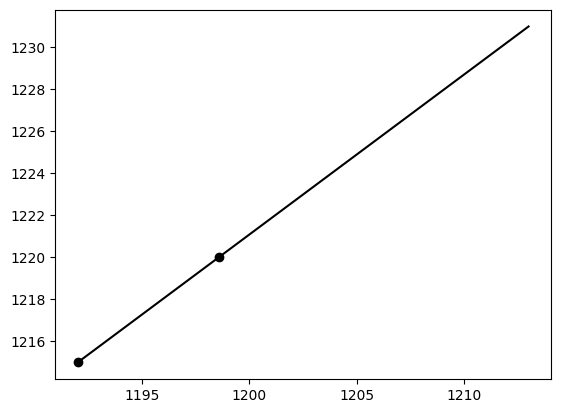

In [176]:
one = Edge(Point(Fraction(19177, 16), Fraction(1220, 1)), Point(1192, 1215), None)
two = Edge(Point(1213, 1231), Point(Fraction(19177, 16), Fraction(1220, 1)), None)

# polygon_plt()
edge_plt(one)
edge_plt(two)

# Obtaining convex polygons

In [177]:
def next(e: Edge):
    outs = sorted(e.pt2.outgoing, key=lambda f : angle(e.pt1, e.pt2, f.pt2))
    next = list(filter(lambda x : x != e.twin, outs))[0]
    return next

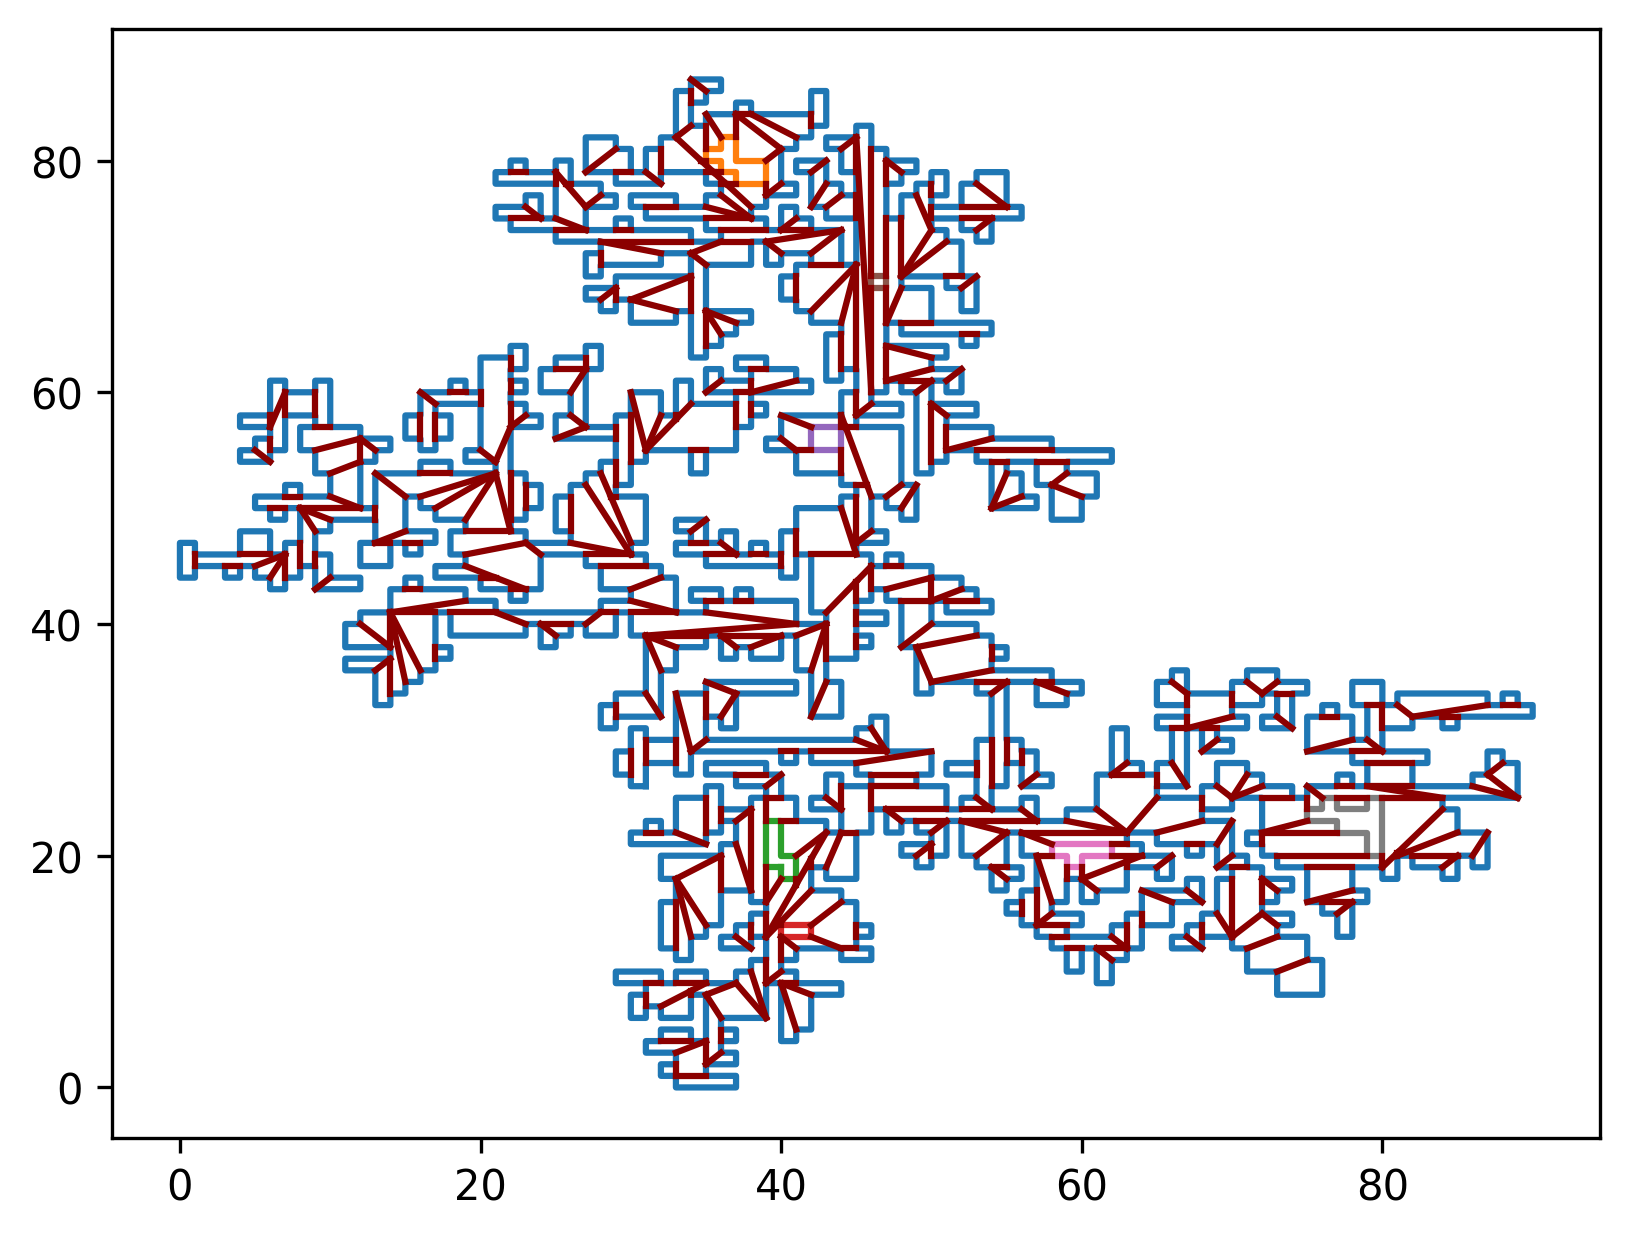

In [178]:
polygon_plt()

for new in newedges:
    xs = [new[0].pt1.coordinate[0], new[0].pt2.coordinate[0]]
    ys = [new[0].pt1.coordinate[1], new[0].pt2.coordinate[1]]
    plt.plot(xs, ys, c='darkred')
# inc = poly.points[1].incoming[0]
# nex1 = next(newedges[x][0])
# nex2 = next(newedges[x][1])

# edge_plt(newedges[x][0])
# edge_plt(nex1)
# edge_plt(nex2)
plt.gcf().set_dpi(300)
# plt.xlim((25,55))
# plt.ylim((-5,25))
plt.show()

In [179]:
def get_polygons_adj_half_edge(half_edges, polygons):
    r_out, r_in = half_edges

    cvex1 = None
    cvex2 = None
    
    skip1 = False
    skip2 = False

    for polygon in polygons:
        if r_out in polygon:
            skip1 = True
        if r_in in polygon:
            skip2 = True

    if not skip1:
        cvex1 = []

        cur = r_out
        prev = None

        while cur not in cvex1:
            # print("attempting to find cvex1 with ", cur)
            cvex1.append(cur)
            prev = cur
            cur = next(cur)

        # cvex1.append(cur)

    if not skip2:
        cvex2 = []

        r_in_out = next(r_in)
        cur = r_in_out
        prev = None

        while cur not in cvex2:
            # print("attempting to find cvex2 with ", cur)
            cvex2.append(cur)
            prev = cur
            cur = next(cur)

        # cvex2.append(cur)

    return cvex1, cvex2

8 4


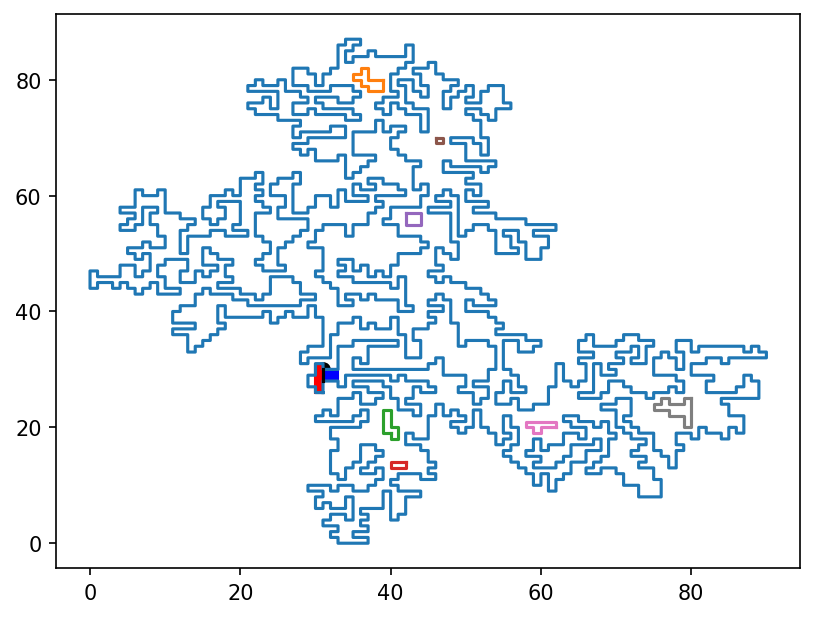

In [180]:
x = 0
c1, c2 = get_polygons_adj_half_edge(newedges[x], [])

print(len(c1), len(c2))

polygon_plt()
edge_plt(newedges[x][0])

xs = [e.pt1.coordinate[0] for e in c1]
ys = [e.pt1.coordinate[1] for e in c1]

plt.fill(xs, ys, c='red')

xs = [e.pt1.coordinate[0] for e in c2]
ys = [e.pt1.coordinate[1] for e in c2]

plt.fill(xs, ys, c='blue')

plt.gcf().set_dpi(150)
plt.show()

In [181]:
# polygon_plt()

# hi = newedges[0][1]
# for i in range(4):
#     # edge_plt(hi)
#     hi = next(hi)

# edge_plt(hi)

# pt_plot([hi.pt2])

# edge_plt(hi.pt2.outgoing[1])


In [182]:
# print(reflcopy[8].incoming[1], next(reflcopy[8].incoming[1]), reflcopy[8].incoming[1].twin, next(reflcopy[8].incoming[1]).twin)

# print(reflcopy[8].incoming)
# print("8out: ", reflcopy[8].outgoing)

# for edge in reflcopy[8].outgoing:
#     print(edge.pt2.coordinate)
#     print(angle(reflcopy[8].incoming[1].pt1, reflcopy[8], edge.pt2))

In [183]:
polygons=[]
for i in range(len(newedges)):
    print(i)
    pair = newedges[i]
    L, R = get_polygons_adj_half_edge(pair, polygons)
    if L is not None: polygons.append(L)
    if R is not None: polygons.append(R)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

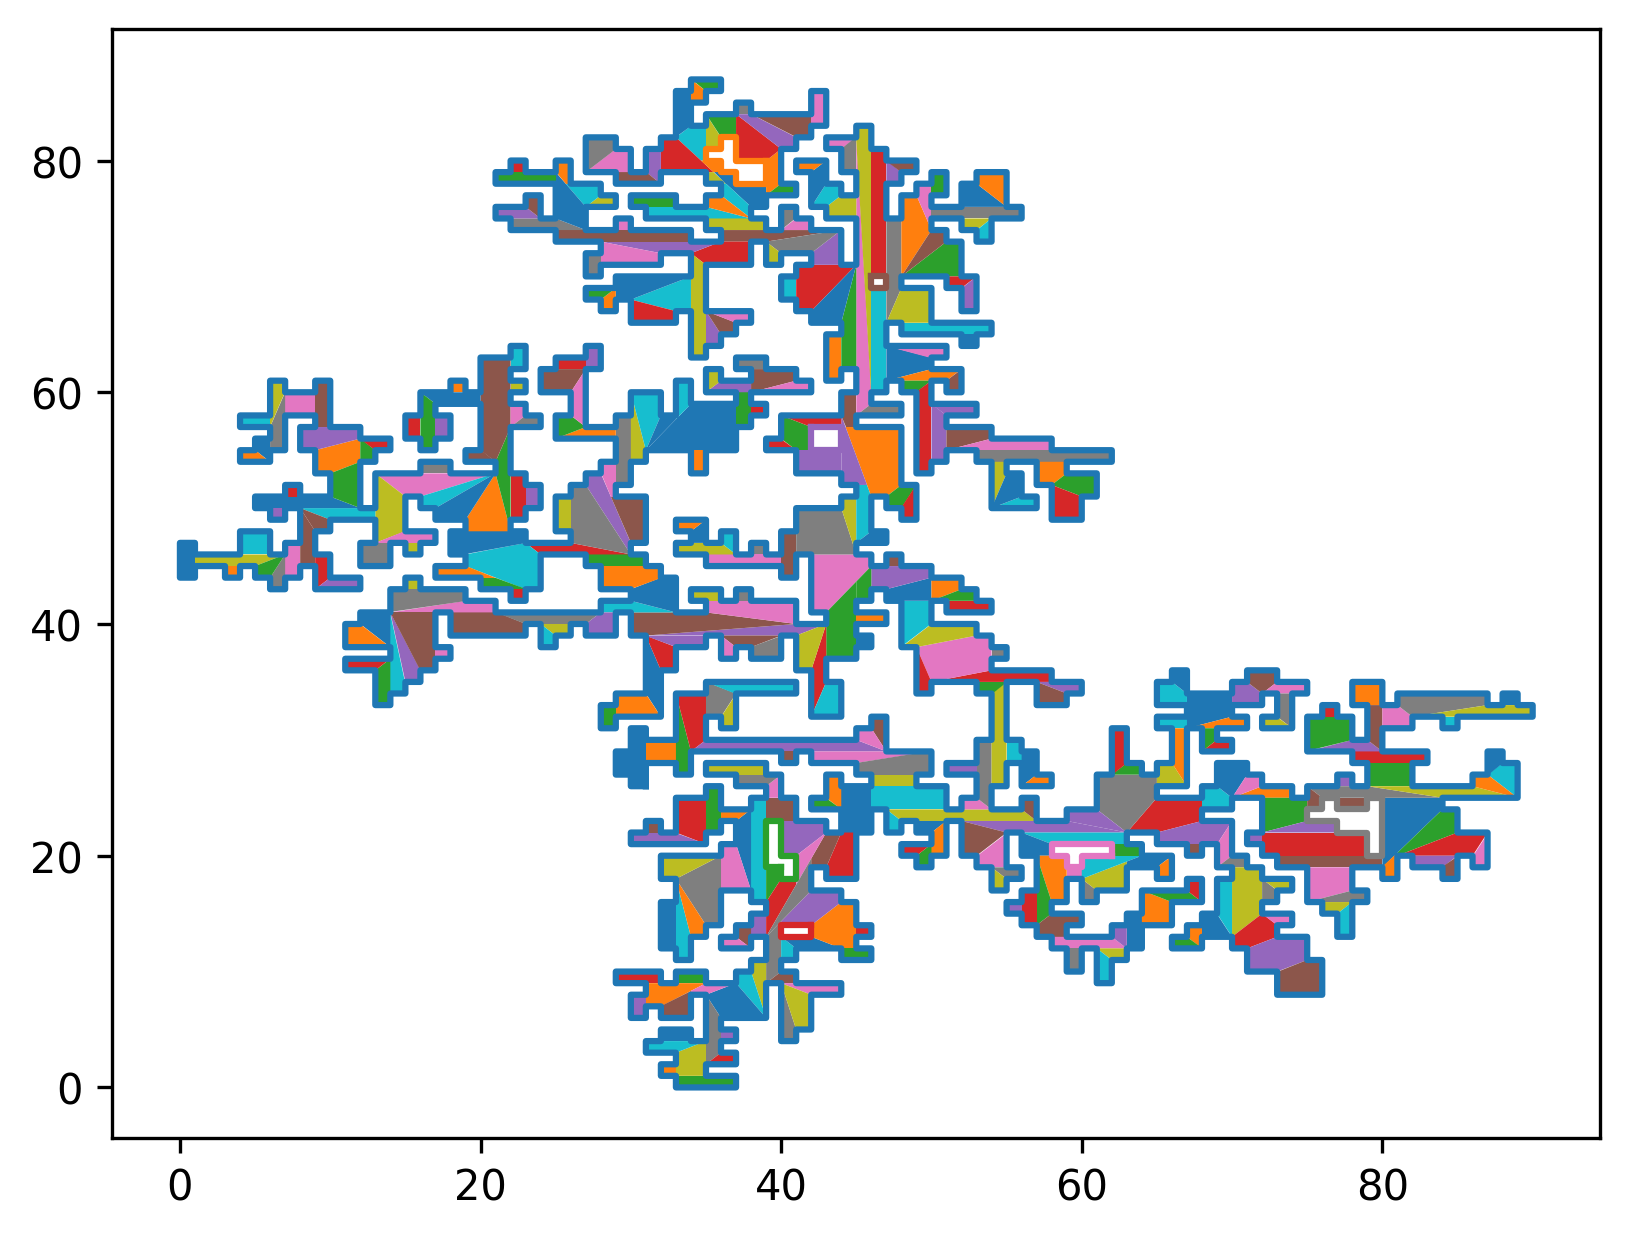

In [184]:
polygon_plt()

for polygon_edges in polygons:
    xs = [e.pt1.coordinate[0] for e in polygon_edges]
    ys = [e.pt1.coordinate[1] for e in polygon_edges]

    plt.fill(xs, ys)

plt.gcf().set_dpi(300)

# Printing JSON

In [185]:
#polygons_to_write = []
#for pp in poly.holes:
#    print(pp.points)
#polygons_to_write = poly.holes #I hope you can make a list with all polygons and add those in the parameter "polygons_to_write"
#print(polygons_to_write)
#print(polygons)
#Name variables for dictionary
filename = path_to_testfile
print(filename)
leftbound = ''.join(filename).rindex('/')
rightbound = ''.join(filename).rindex('i')
#print(filename[leftbound+1:])
#print(filename[:rightbound])
print(filename[leftbound+1:rightbound-1])
instance = filename[leftbound+1:rightbound-1]
typename = "CGSHOP2023_Solution"

from decimal import Decimal

def to_float(d):
    d = Decimal(str(d)) #cast as string for proper fraction
    nom, den = d.as_integer_ratio()
    if den==1:
        #print(d)
        return d
    else:
        #print(nom, den)
        dict = {"num": nom, "den": den}
        return dict

def frac_to_dict(f):
    #print(f.numerator, f.denominator)
    dict = {"num": f.numerator, "den": f.denominator}
    return dict

lists = polygons
listsfin= []
listsdict = []

for item in lists:
    #print(item)
    for el in item:
        #print(el, el.pt1, el.pt2, el.pt1.coordinate, el.pt1.coordinate[0], el.pt1.coordinate[1])
        xc = el.pt1.coordinate[0]
        yc = el.pt1.coordinate[1]
        if(isinstance(xc, float)):
            xc = to_float(xc)
        if(type(xc) == Fraction):
            #print("Fraction")
            xc = frac_to_dict(xc)
        if(isinstance(yc, float)):
            yc = to_float(yc)
        if(type(yc) == Fraction):
            #print("Fraction")
            yc = frac_to_dict(yc)
        dictxy = {"x": xc, "y": yc}
        #print(dictxy)
        listsdict.append(dictxy)
    #print("NEW")
    listsfin.append(listsdict)
    #print(listsfin)
    listsdict = []

finaldict = {
    "type": typename,
    "instance": instance,
    "polygons": listsfin
}
#print(finaldict)
json_object = json.dumps(finaldict, indent=4)
with open("sol_"+instance+".json", "w") as outfile:
    outfile.write(json_object)

print("Created a json output file called:", "sol_"+instance+".json\n" , "for instance", instance,"\n", "with the following contents:\n", finaldict)
print("\nPlease use the polygons_to_write field to fill in all polygons that should be in the json file, this is now placeholded with the original holes")
        

./instances-2IMA15/instances-2IMA15/srpg_iso_aligned_mc0001336.instance.json
srpg_iso_aligned_mc0001336
Created a json output file called: sol_srpg_iso_aligned_mc0001336.json
 for instance srpg_iso_aligned_mc0001336 
 with the following contents:
 {'type': 'CGSHOP2023_Solution', 'instance': 'srpg_iso_aligned_mc0001336', 'polygons': [[{'x': 31, 'y': 28}, {'x': 31, 'y': 30}, {'x': 31, 'y': 31}, {'x': 30, 'y': 31}, {'x': 30, 'y': 29}, {'x': 30, 'y': 27}, {'x': 30, 'y': 26}, {'x': 31, 'y': 26}], [{'x': 31, 'y': 28}, {'x': 33, 'y': 28}, {'x': 33, 'y': 30}, {'x': 31, 'y': 30}], [{'x': 33, 'y': 28}, {'x': 33, 'y': 27}, {'x': 34, 'y': 27}, {'x': 34, 'y': 29}, {'x': 33, 'y': 34}, {'x': 33, 'y': 30}], [{'x': 34, 'y': 29}, {'x': 35, 'y': 30}, {'x': 35, 'y': 32}, {'x': 35, 'y': 34}, {'x': 33, 'y': 34}], [{'x': 40, 'y': 29}, {'x': 41, 'y': 29}, {'x': 42, 'y': 29}, {'x': 47, 'y': 29}, {'x': 45, 'y': 30}, {'x': 35, 'y': 30}, {'x': 34, 'y': 29}], [{'x': 40, 'y': 29}, {'x': 40, 'y': 28}, {'x': 41, 'y':